### Download the dataset

In [1]:
import urllib.request
url='https://raw.githubusercontent.com/arachnie/hackathon-ericsson/master/test.csv'
print('Beginning file download with urllib2...')
urllib.request.urlretrieve(url,'test.csv')

#also download for train.csv
url='https://raw.githubusercontent.com/arachnie/hackathon-ericsson/master/train.csv'
print('Beginning file download with urllib2...')
urllib.request.urlretrieve(url,'train.csv')

Beginning file download with urllib2...
Beginning file download with urllib2...


('train.csv', <http.client.HTTPMessage at 0x111066358>)

### Save the data as Pandas Dataframe

In [2]:
import pandas as pd
# get titanic & test csv files as a DataFrame
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

titanic = train.append( test , ignore_index = True )
#titanic = full[ :891 ]

del train , test




In [3]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [4]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### Finding Duplication

In [5]:
titanic[titanic.duplicated(keep=False)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


No duplication in this dataset

In [6]:
# See which columns have missing values in training data:

titanic.isnull().sum()


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### There are 2 missing values for the port that the passenger embarked on in training data. Let's have a look at these two passengers:


In [7]:
titanic[pd.isnull(titanic['Embarked'])]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [8]:
data =titanic[(titanic['Pclass'] == 1) & (titanic['Fare'] > 70) & (titanic['Fare'] < 90) ]

In [9]:
data['Embarked'].value_counts()

C    29
S    23
Name: Embarked, dtype: int64

In [10]:
data['Embarked'].mode()

0    C
dtype: object

In [11]:
titanic.iloc[:, 2] = titanic.iloc[:, 2].fillna('C')

In [12]:
titanic[pd.isnull(titanic['Embarked'])]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [13]:
data =titanic[(titanic['Pclass'] == 1) & (titanic['Fare'] > 70) & (titanic['Fare'] < 90)]

In [14]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
34,28.0,NaN,C,82.1708,"Meyer, Mr. Edgar Joseph",0,35,1,male,1,0.0,PC 17604
52,49.0,D33,C,76.7292,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,53,1,female,1,1.0,PC 17572
61,38.0,B28,C,80.0000,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
62,45.0,C83,S,83.4750,"Harris, Mr. Henry Birkhardt",0,63,1,male,1,0.0,36973
102,21.0,D26,S,77.2875,"White, Mr. Richard Frasar",1,103,1,male,0,0.0,35281
124,54.0,D26,S,77.2875,"White, Mr. Percival Wayland",1,125,1,male,0,0.0,35281
139,24.0,B86,C,79.2000,"Giglio, Mr. Victor",0,140,1,male,0,0.0,PC 17593
218,32.0,D15,C,76.2917,"Bazzani, Miss. Albina",0,219,1,female,0,1.0,11813
230,35.0,C83,S,83.4750,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",0,231,1,female,1,1.0,36973


#### Missing fare

In [15]:
titanic[pd.isnull(titanic['Fare'])]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


#### Fill in with the mean values for passenger with the same class and embarkment

In [16]:
third_class_pass = titanic[(titanic['Pclass'] == 3) & (titanic['Embarked']=='S')]

In [17]:
third_class_pass

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.00,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
2,26.00,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
4,35.00,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
7,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.00,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
10,4.00,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549
12,20.00,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,13,3,male,0,0.0,A/5. 2151
13,39.00,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,14,3,male,1,0.0,347082
14,14.00,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,female,0,0.0,350406
18,31.00,NaN,S,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,female,1,0.0,345763


In [18]:
titanic.iloc[:, 3] = titanic.iloc[:, 3].fillna(third_class_pass.mean(0)['Fare'])

### Missing age
There are multiple age values missing in both training and test data. Let's first have a look at the data rows with missing age:

In [19]:
titanic[pd.isnull(titanic['Age'])]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
29,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0.0,349216
31,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1.0,PC 17569
32,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1.0,335677
36,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,1.0,2677
42,NaN,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,43,3,male,0,0.0,349253


Most of the missing age values seem to come from third class passengers. Let's have a look if there are notible mean age differences between different passenger classes:

In [20]:
titanic.groupby(['Pclass'], as_index=False)['Age'].mean()

,Pclass,Age
0,1,39.159930
1,2,29.506705
2,3,24.816367


Indeed it seems that first class passengers were the oldest and third class passengers - the youngest. Let's have a look further if there was a difference between male and female average ages:

In [21]:
titanic.groupby(['Pclass', 'Sex'], as_index=False)['Age'].mean()

,Pclass,Sex,Age
0,1,female,37.037594
1,1,male,41.029272
2,2,female,27.499223
3,2,male,30.815380
4,3,female,22.185329
5,3,male,25.962264


In [22]:
titanic.groupby(['Pclass', 'Sex'], as_index=False)['Age'].median()

,Pclass,Sex,Age
0,1,female,36.0
1,1,male,42.0
2,2,female,28.0
3,2,male,29.5
4,3,female,22.0
5,3,male,25.0


In [23]:
for i in range(len(titanic)):
    # if age is null
    if pd.isnull(titanic.iloc[i, 0]):
        # if passenger male
        if titanic.iloc[i, 8] == 'male':
            # age estimate based on passenger class
            titanic.iloc[i, 0] = {1: 42, 2: 29.5, 3:25}[titanic.iloc[i, 7]]
        else:
            # if passenger is female
            titanic.iloc[i, 0] = {1: 36, 2: 328, 3:22}[titanic.iloc[i, 7]]


In [24]:
# Separate the trainig and testing data
X_train = titanic[:891]
X_test = titanic[891:]

### Let's have a look if Passenger Class had an influence on survival rate:

In [25]:
X_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Passenger class seems to be another good predictor of survival rate, where 1st class passengers were most likely to survive and 3rd class passengers - least likely.

### Ticket fare
Intuitively one would expect a similar trend to that of passenger class when looking at ticket prices. Let's first plot the distribution of ticket prices.

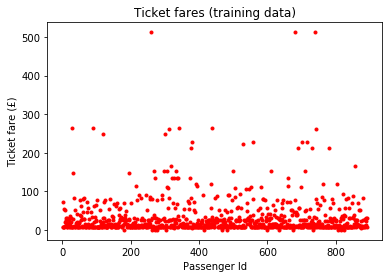

In [26]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
plt.plot(X_train['PassengerId'], X_train['Fare'], 'r.')
plt.title('Ticket fares (training data)')
ax.set_ylabel('Ticket fare (£)')
ax.set_xlabel('Passenger Id')
plt.show()

### Let say we have decided that the most relevant features are: 
Sex
Pclass
Fare
Age


In [28]:
#Change the sex values from male and female to 0 and 1
import numpy as np
sex = pd.Series( np.where(  X_train ['Sex']== 'male' , 1 , 0 ) , name = 'Sex' )

full_X = pd.concat([sex,X_train['Pclass'], X_train['Fare'], X_train['Age']],axis=1)

In [29]:
full_X.head(10)


,Sex,Pclass,Fare,Age
0,1,3,7.2500,22.0
1,0,1,71.2833,38.0
2,0,3,7.9250,26.0
3,0,1,53.1000,35.0
4,1,3,8.0500,35.0
5,1,3,8.4583,25.0
6,1,1,51.8625,54.0
7,1,3,21.0750,2.0
8,0,3,11.1333,27.0
9,0,2,30.0708,14.0


### We can start apply classification models on the selected features that we have identified: Sex, Pclass, Fare, Age

In [30]:
 # Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.cross_validation import train_test_split , StratifiedKFold

# Divide the dataset into training, validation and testing data
train_valid_X = full_X[ 0:891 ]
train_valid_y = titanic.Survived[0:891]
test_X = full_X[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:

from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

model = RandomForestClassifier(n_estimators=100)

In [32]:
model.fit( train_X , train_y )


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Model Performance

In [33]:
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

0.983948635634 0.809701492537
